In [84]:
import pandas as pd
df = pd.read_csv("../data/processed/health_checkup_processed.csv")

In [85]:
df.shape, df.columns

((662623, 29),
 Index(['성별코드', '연령대코드(5세단위)', '신장(5cm단위)', '체중(5kg단위)', '허리둘레', '시력(좌)',
        '시력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드',
        'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)',
        '혈청지피티(ALT)', '감마지티피', '흡연상태', '음주여부', 'bmi', 'alt_ast_ratio',
        'tg_hdl_ratio', 'ggtp_alt_ratio', 'ldl_hdl_ratio', 'pulse_pressure',
        'hypertension_status'],
       dtype='object'))

In [86]:
df['hypertension_status'].value_counts()

hypertension_status
0    555132
1    107491
Name: count, dtype: int64

| 값   | 의미    | 샘플 수    | 비율          |
| --- | ----- | ------- | ----------- |
| `0` | 정상 혈압 | 555,153 | 약 **83.8%** |
| `1` | 고혈압   | 107,495 | 약 **16.2%** |

| 관점         | 전략                                                                       |
| ---------- | ------------------------------------------------------------------------ |
| 분류 모델 선택 시 | `accuracy`만 보면 안 됨 → 고혈압(1)을 무시해도 정확도 높게 나옴                           |
| 평가 지표      | `precision`, `recall`, `F1-score`, **AUC-ROC** 등을 반드시 봐야 함               |
| 학습 데이터     | 언더샘플링/오버샘플링 고려 →  **SMOTE**, ADASYN, 또는 **XGBoost 내 class\_weight 조정** |

타겟 분포 확인 결과, 전체 데이터 중 약 16.2%가 고혈압 환자로 분류되며,  
이는 분류 모델 학습 시 클래스 불균형 문제를 고려해야 함을 시사 
정확도 외에도 정밀도(Precision), 재현율(Recall), AUC 등 다양한 평가지표와  
샘플링 전략 또는 가중치 보정이 함께 사용 필요

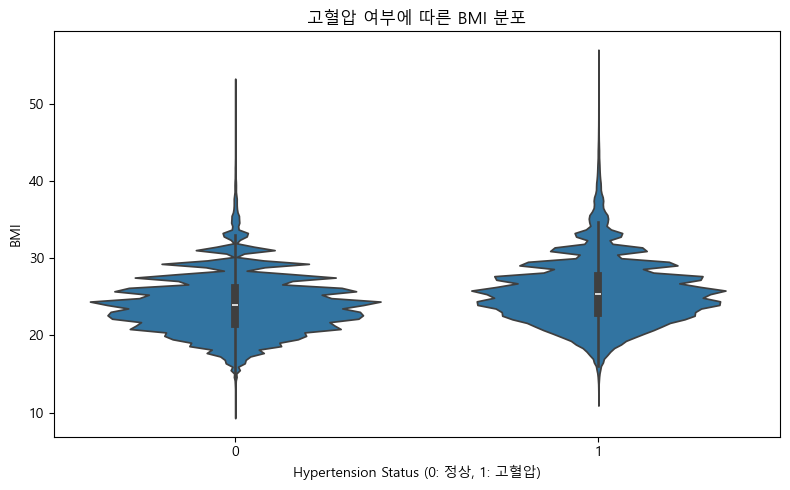

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows의 경우)
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우: 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False      # 마이너스 기호 깨짐 방지

plt.figure(figsize=(8, 5))
sns.violinplot(x='hypertension_status', y='bmi', data=df, inner='box')
plt.title("고혈압 여부에 따른 BMI 분포")
plt.xlabel("Hypertension Status (0: 정상, 1: 고혈압)")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()

Violinplot을 통해 BMI 분포를 시각화한 결과,  
고혈압자는 정상자에 비해 BMI의 전체 분포가 우측으로 이동해 있으며,  
과체중~비만(BMI 27~30) 구간에 밀도 집중이 뚜렷하게 나타난다.  
이는 BMI가 고혈압 발생과 밀접한 관련이 있음을 시사하며,  
고도비만(BMI > 35)에서의 꼬리 확장은 고위험군 특성으로 해석

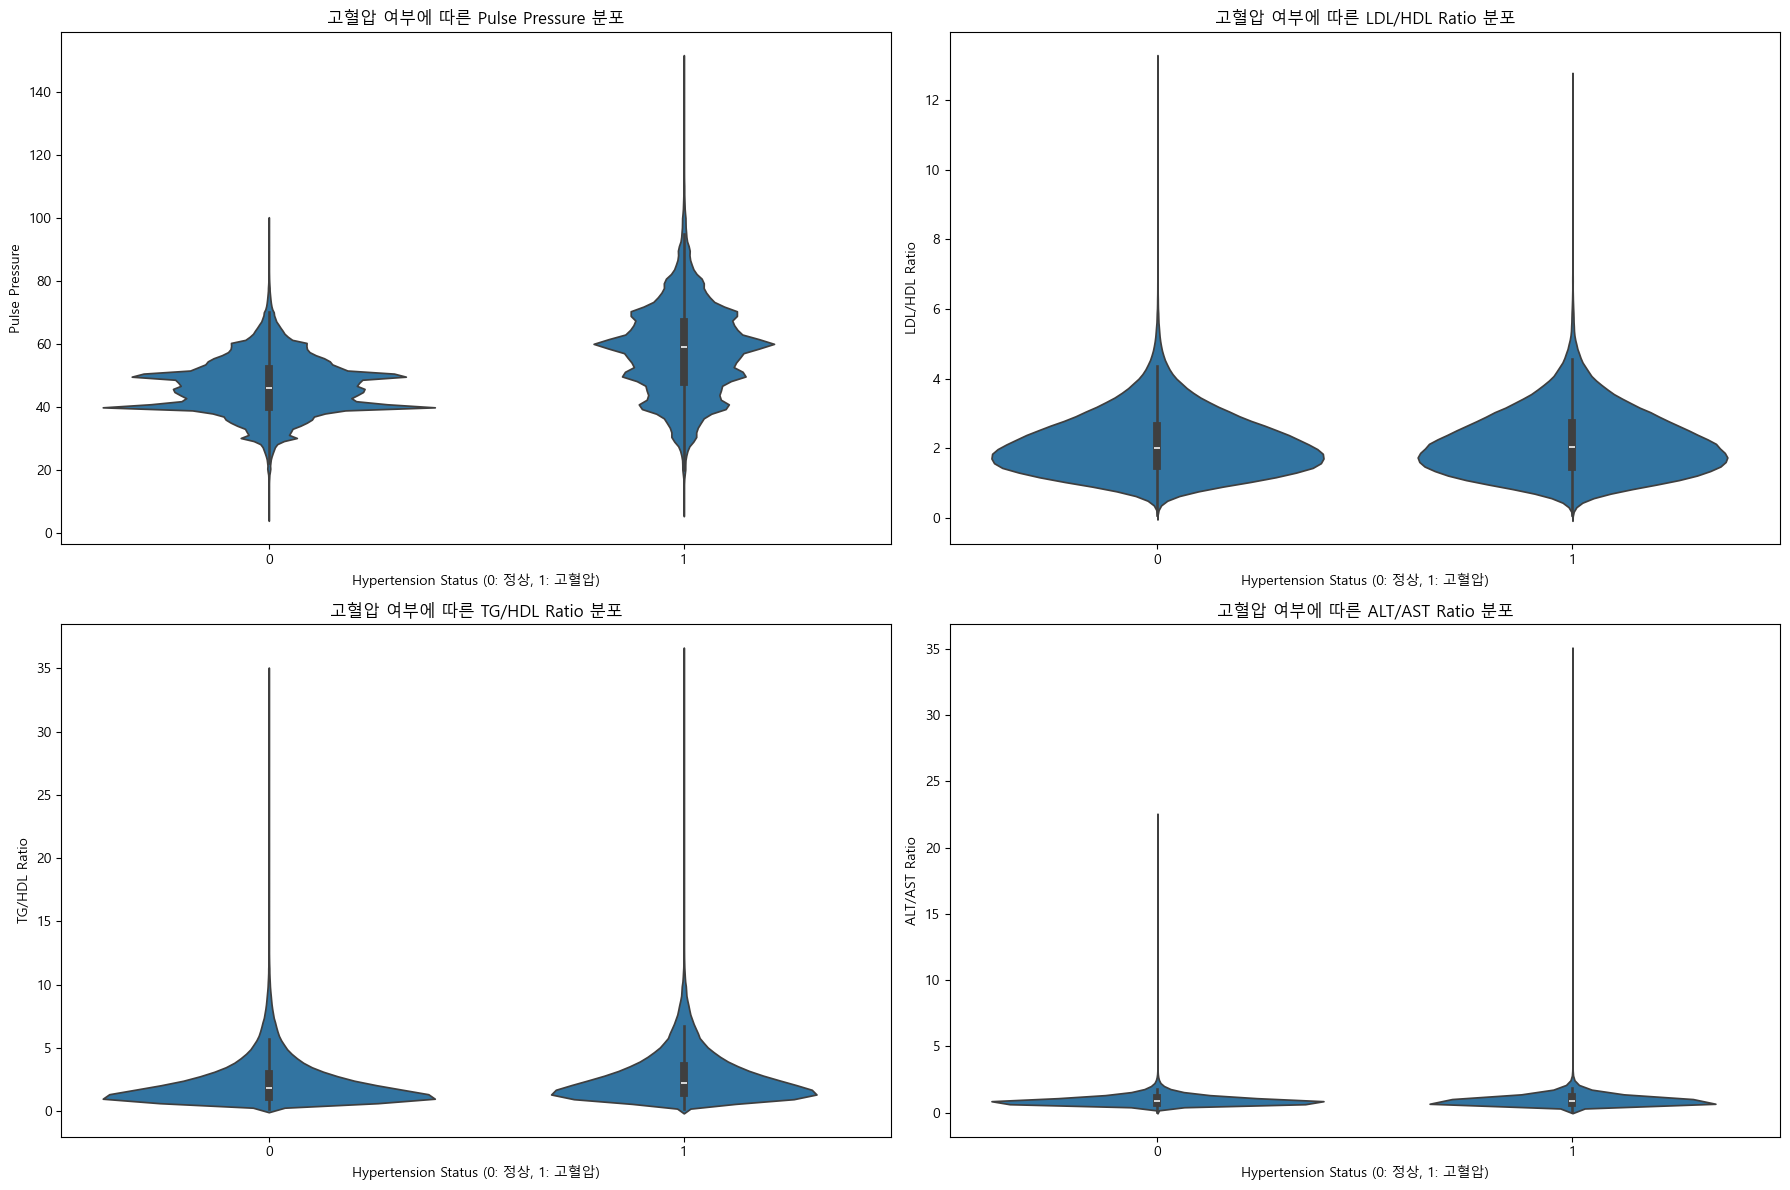

In [88]:
# 시각화할 변수 리스트
plot_features = ['pulse_pressure', 'ldl_hdl_ratio', 'tg_hdl_ratio', 'alt_ast_ratio']
titles = ['Pulse Pressure', 'LDL/HDL Ratio', 'TG/HDL Ratio', 'ALT/AST Ratio']

plt.figure(figsize=(18, 12))

for i, feature in enumerate(plot_features):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='hypertension_status', y=feature, data=df, inner='box')
    plt.title(f"고혈압 여부에 따른 {titles[i]} 분포")
    plt.xlabel("Hypertension Status (0: 정상, 1: 고혈압)")
    plt.ylabel(titles[i])

plt.tight_layout()
plt.show()

In [89]:
import pandas as pd
df_filtered2 = pd.read_csv("D:/python-workspace/DATA_ANALYSIS/health_checkup_processed.csv")

In [90]:
# 한글 폰트 설정 (Windows의 경우)
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우: 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False      # 마이너스 기호 깨짐 방지

In [139]:
# 시력 이상치 제거
df_filtered2 = df_filtered2[df_filtered2['시력(좌)'] <= 2.0]

# 시력(좌)

Text(0, 0.5, 'Frequency')

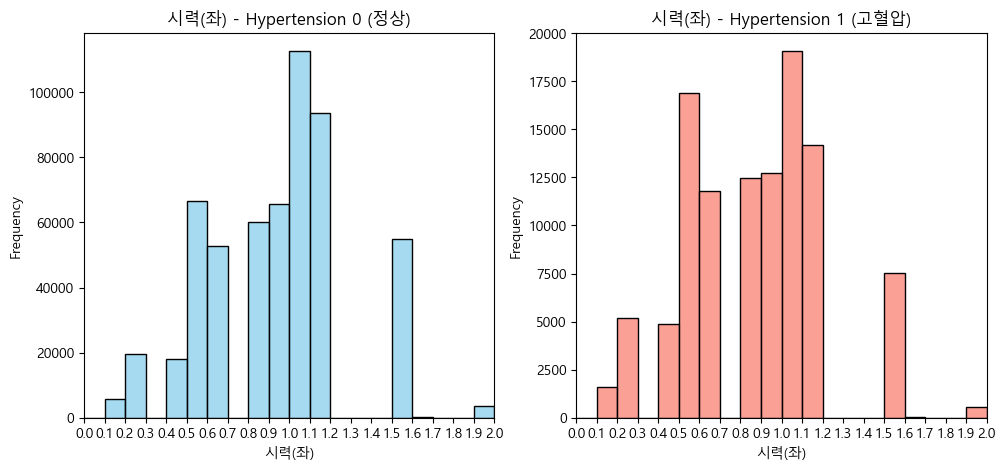

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

target_col1 = '시력(좌)'
target_col2 = 'LDL콜레스테롤'
target_col3 = '트리글리세라이드'
target_col4 = '식전혈당(공복혈당)'

group_0 = df_filtered2[df_filtered2['hypertension_status'] == 0] #정상
group_1 = df_filtered2[df_filtered2['hypertension_status'] == 1] #고혈압

plt.figure(figsize=(18, 5))

# 1) hypertension 0 (정상)
plt.subplot(1, 3, 1)
sns.histplot(group_0[target_col1], kde=False, bins=np.arange(0, 2.1, 0.1), color='skyblue')
plt.title(f'{target_col1} - Hypertension 0 (정상)')
plt.xlim(0, 2)
plt.xticks(np.arange(0, 2.1, 0.1))
plt.xlabel(target_col1)
plt.ylabel('Frequency')

# 2) hypertension 1 (고혈압)
plt.subplot(1, 3, 2)
sns.histplot(group_1[target_col1], kde=False, bins=np.arange(0, 2.1, 0.1), color='salmon')
plt.title(f'{target_col1} - Hypertension 1 (고혈압)')
plt.xlim(0, 2)
plt.xticks(np.arange(0, 2.1, 0.1))
plt.xlabel(target_col1)
plt.ylabel('Frequency')

In [151]:
print(((df_filtered2['시력(좌)'] >= 0.3) & (df_filtered2['시력(좌)'] <= 0.4)).value_counts())

시력(좌)
False    621809
True      38677
Name: count, dtype: int64


In [153]:
group_0[target_col1].value_counts()

시력(좌)
1.0    112683
1.2     93627
0.9     65534
0.8     60077
1.5     54847
0.7     52925
0.6     34115
0.5     32509
0.4     17976
0.3     12536
0.2      7104
0.1      5666
2.0      3691
1.6       108
1.1        45
1.3        38
1.9        14
1.8        12
1.4         8
1.7         5
Name: count, dtype: int64

C:\Users\asia\AppData\Local\Temp\ipykernel_10112\419694482.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = df_filtered2.groupby(['bin', 'hypertension_status']).size().reset_index(name='count')


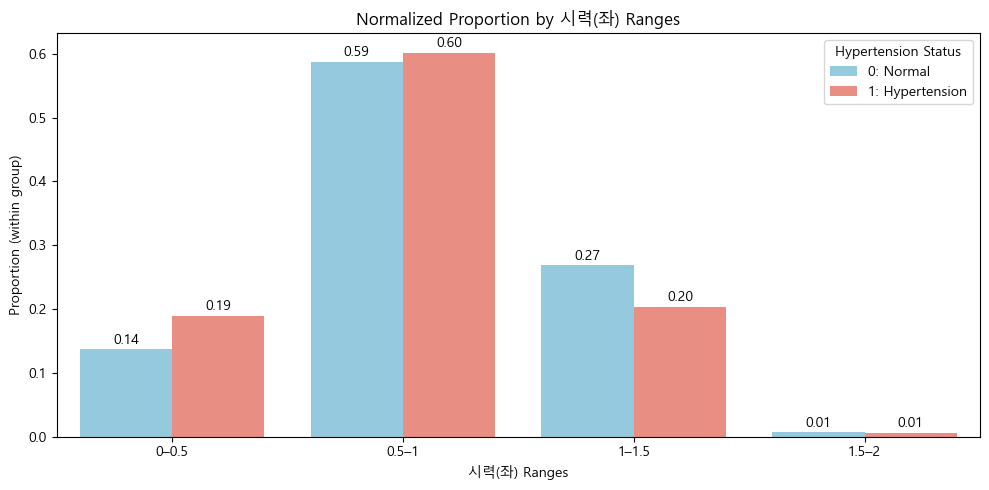

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 대상 변수 설정
target_col = '시력(좌)'

# 구간 나누기 (0~3, 0.5 단위 → 4개 구간)
bins = [0, 0.5, 1, 1.5, 2]
labels = ['0–0.5', '0.5–1', '1–1.5', '1.5–2']

df_filtered2['bin'] = pd.cut(df_filtered2[target_col], bins=bins, labels=labels, include_lowest=True)

# 각 그룹의 전체 수 (정규화 기준)
total_normal = len(df_filtered2[df_filtered2['hypertension_status'] == 0])
total_hyper = len(df_filtered2[df_filtered2['hypertension_status'] == 1])

# 구간별 count 계산
bin_counts = df_filtered2.groupby(['bin', 'hypertension_status']).size().reset_index(name='count')

# 정규화된 비율 (각 그룹의 전체 수 대비 비율)
def normalize(row):
    if row['hypertension_status'] == 0:
        return row['count'] / total_normal
    else:
        return row['count'] / total_hyper

bin_counts['normalized_ratio'] = bin_counts.apply(normalize, axis=1)

# 시각화
plt.figure(figsize=(10, 5))
barplot = sns.barplot(  # ← barplot 객체로 저장
    data=bin_counts,
    x='bin',
    y='normalized_ratio',
    hue='hypertension_status',
    palette={0: 'skyblue', 1: 'salmon'}  # 각 클래스 색 명시
)

# 막대 위에 수치 표시
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f', label_type='edge', padding=2)

# 범례 수동 설정
handles, labels = barplot.get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=['0: Normal', '1: Hypertension'],
    title='Hypertension Status'
)

plt.title(f'Normalized Proportion by {target_col} Ranges')
plt.xlabel(f'{target_col} Ranges')
plt.ylabel('Proportion (within group)')
plt.tight_layout()
plt.show()


C:\Users\asia\AppData\Local\Temp\ipykernel_10112\3108505772.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered2, x='hypertension_status', y=target_col1, palette={'0': 'skyblue', '1': 'salmon'})


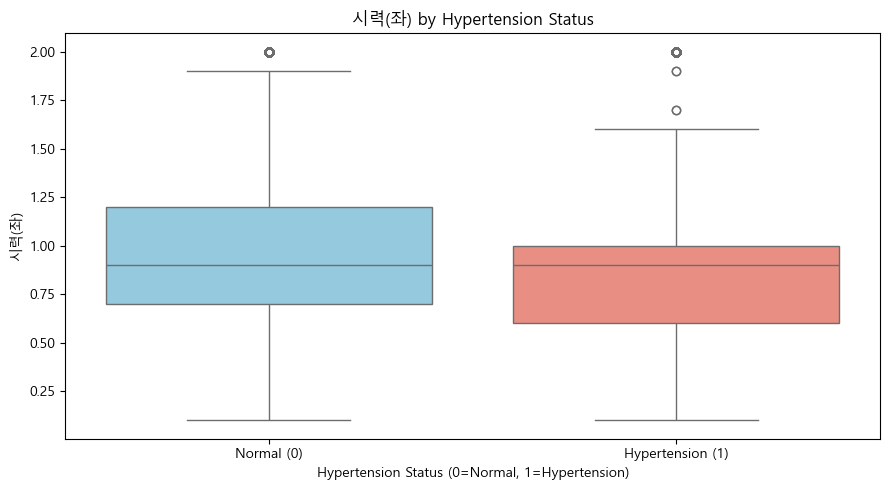

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# 예시 데이터프레임 확인 (실제 코드에서는 df_filtered2가 있어야 함)
# print(df_filtered2.columns)

target_col1 = '시력(좌)'

plt.figure(figsize=(9, 5))  # subplot 1개라 크기 줄임

sns.boxplot(data=df_filtered2, x='hypertension_status', y=target_col1, palette={'0': 'skyblue', '1': 'salmon'})
plt.title(f'{target_col1} by Hypertension Status')
plt.xlabel('Hypertension Status (0=Normal, 1=Hypertension)')
plt.ylabel(target_col1)
plt.xticks([0, 1], ['Normal (0)', 'Hypertension (1)'])

plt.tight_layout()
plt.show()



# LDL콜레스테롤

Text(0, 0.5, 'Frequency')

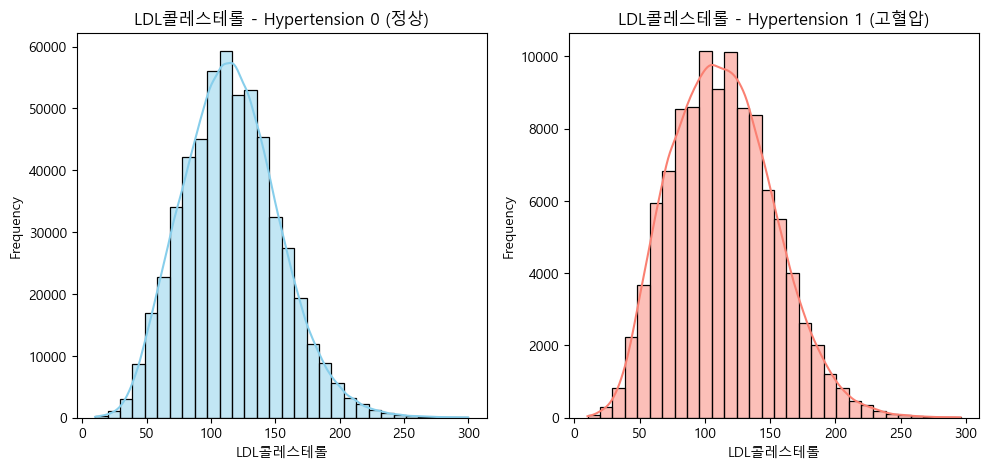

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

target_col1 = '시력(좌)'
target_col2 = 'LDL콜레스테롤'
target_col3 = '트리글리세라이드'
target_col4 = '식전혈당(공복혈당)'

group_0 = df_filtered2[df_filtered2['hypertension_status'] == 0] #정상
group_1 = df_filtered2[df_filtered2['hypertension_status'] == 1] #고혈압

plt.figure(figsize=(18, 5))

# 1) alt_ast_ratio - 고혈압 0
plt.subplot(1, 3, 1)
sns.histplot(group_0[target_col2], kde=True, bins=30, color='skyblue')
plt.title(f'{target_col2} - Hypertension 0 (정상)')
plt.xlabel(target_col2)
plt.ylabel('Frequency')

# 2) alt_ast_ratio - 고혈압 1
plt.subplot(1, 3, 2)
sns.histplot(group_1[target_col2], kde=True, bins=30, color='salmon')
plt.title(f'{target_col2} - Hypertension 1 (고혈압)')
plt.xlabel(target_col2)
plt.ylabel('Frequency')


C:\Users\asia\AppData\Local\Temp\ipykernel_10112\159935887.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = df_filtered2.groupby(['bin', 'hypertension_status']).size().reset_index(name='count')


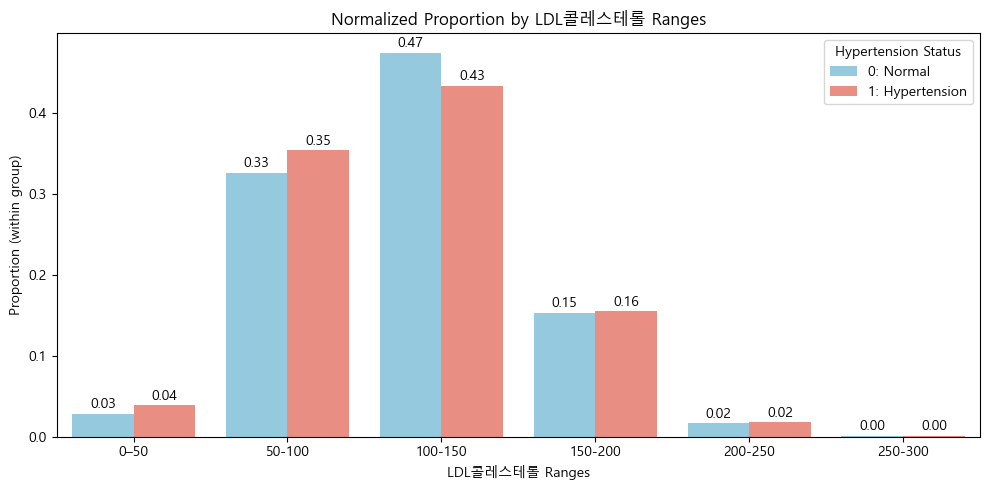

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 대상 변수 설정
target_col2 = 'LDL콜레스테롤'

# 구간 나누기 (0~300, 구간 50 단위 → 6개 구간)
bins = [0, 50, 100, 150, 200, 250, 300]
labels = ['0–50', '50-100', '100-150', '150-200', '200-250', '250-300']

df_filtered2['bin'] = pd.cut(df_filtered2[target_col2], bins=bins, labels=labels, include_lowest=True)

# 각 그룹의 전체 수 (정규화 기준)
total_normal = len(df_filtered2[df_filtered2['hypertension_status'] == 0])
total_hyper = len(df_filtered2[df_filtered2['hypertension_status'] == 1])

# 구간별 count 계산
bin_counts = df_filtered2.groupby(['bin', 'hypertension_status']).size().reset_index(name='count')

# 정규화된 비율 (각 그룹의 전체 수 대비 비율)
def normalize(row):
    if row['hypertension_status'] == 0:
        return row['count'] / total_normal
    else:
        return row['count'] / total_hyper

bin_counts['normalized_ratio'] = bin_counts.apply(normalize, axis=1)

# 시각화
plt.figure(figsize=(10, 5))
barplot = sns.barplot(  # ← barplot 객체로 저장
    data=bin_counts,
    x='bin',
    y='normalized_ratio',
    hue='hypertension_status',
    palette={0: 'skyblue', 1: 'salmon'}  # 각 클래스 색 명시
)

# 막대 위에 수치 표시
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f', label_type='edge', padding=2)

# 범례 수동 설정
handles, labels = barplot.get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=['0: Normal', '1: Hypertension'],
    title='Hypertension Status'
)

plt.title(f'Normalized Proportion by {target_col2} Ranges')
plt.xlabel(f'{target_col2} Ranges')
plt.ylabel('Proportion (within group)')
plt.tight_layout()
plt.show()


C:\Users\asia\AppData\Local\Temp\ipykernel_10112\3432918598.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered2, x='hypertension_status', y=target_col2, palette={'0': 'skyblue', '1': 'salmon'})


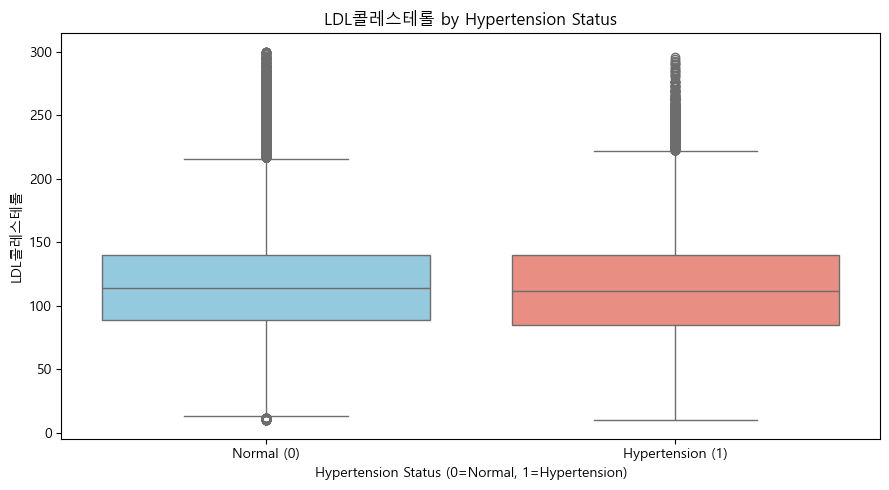

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# 예시 데이터프레임 확인 (실제 코드에서는 df_filtered2가 있어야 함)
# print(df_filtered2.columns)

target_col2 = 'LDL콜레스테롤'

plt.figure(figsize=(9, 5))  # subplot 1개라 크기 줄임

sns.boxplot(data=df_filtered2, x='hypertension_status', y=target_col2, palette={'0': 'skyblue', '1': 'salmon'})
plt.title(f'{target_col2} by Hypertension Status')
plt.xlabel('Hypertension Status (0=Normal, 1=Hypertension)')
plt.ylabel(target_col2)
plt.xticks([0, 1], ['Normal (0)', 'Hypertension (1)'])

plt.tight_layout()
plt.show()


# 트리글리세라이드

Text(0, 0.5, 'Frequency')

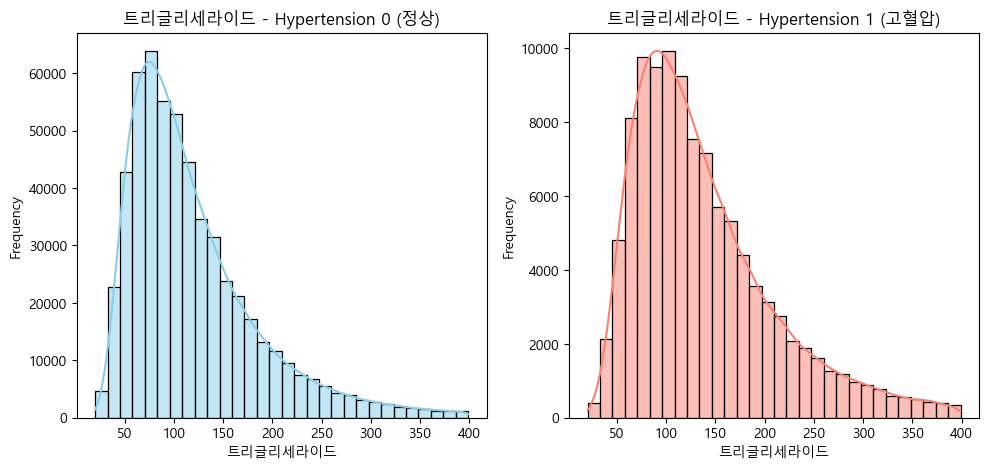

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

target_col1 = '시력(좌)'
target_col2 = 'LDL콜레스테롤'
target_col3 = '트리글리세라이드'
target_col4 = '식전혈당(공복혈당)'

group_0 = df_filtered2[df_filtered2['hypertension_status'] == 0] #정상
group_1 = df_filtered2[df_filtered2['hypertension_status'] == 1] #고혈압

plt.figure(figsize=(18, 5))


plt.subplot(1, 3, 1)
sns.histplot(group_0[target_col3], kde=True, bins=30, color='skyblue')
plt.title(f'{target_col3} - Hypertension 0 (정상)')
plt.xlabel(target_col3)
plt.ylabel('Frequency')


plt.subplot(1, 3, 2)
sns.histplot(group_1[target_col3], kde=True, bins=30, color='salmon')
plt.title(f'{target_col3} - Hypertension 1 (고혈압)')
plt.xlabel(target_col3)
plt.ylabel('Frequency')


C:\Users\asia\AppData\Local\Temp\ipykernel_10112\3561112692.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = df_filtered2.groupby(['bin', 'hypertension_status']).size().reset_index(name='count')


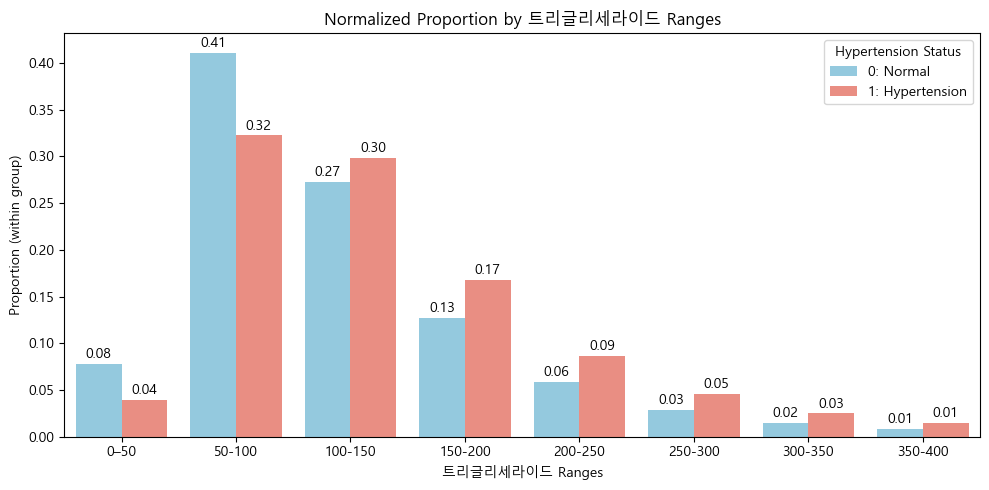

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 대상 변수 설정
target_col3 = '트리글리세라이드'

# 구간 나누기 (0~400, 구간 50 단위 → 8개 구간)
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400]
labels = ['0–50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400']

df_filtered2['bin'] = pd.cut(df_filtered2[target_col3], bins=bins, labels=labels, include_lowest=True)

# 각 그룹의 전체 수 (정규화 기준)
total_normal = len(df_filtered2[df_filtered2['hypertension_status'] == 0])
total_hyper = len(df_filtered2[df_filtered2['hypertension_status'] == 1])

# 구간별 count 계산
bin_counts = df_filtered2.groupby(['bin', 'hypertension_status']).size().reset_index(name='count')

# 정규화된 비율 (각 그룹의 전체 수 대비 비율)
def normalize(row):
    if row['hypertension_status'] == 0:
        return row['count'] / total_normal
    else:
        return row['count'] / total_hyper

bin_counts['normalized_ratio'] = bin_counts.apply(normalize, axis=1)

# 시각화
plt.figure(figsize=(10, 5))
barplot = sns.barplot(  # ← barplot 객체로 저장
    data=bin_counts,
    x='bin',
    y='normalized_ratio',
    hue='hypertension_status',
    palette={0: 'skyblue', 1: 'salmon'}  # 각 클래스 색 명시
)

# 막대 위에 수치 표시
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f', label_type='edge', padding=2)

# 범례 수동 설정
handles, labels = barplot.get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=['0: Normal', '1: Hypertension'],
    title='Hypertension Status'
)

plt.title(f'Normalized Proportion by {target_col3} Ranges')
plt.xlabel(f'{target_col3} Ranges')
plt.ylabel('Proportion (within group)')
plt.tight_layout()
plt.show()

C:\Users\asia\AppData\Local\Temp\ipykernel_10112\1010156827.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered2, x='hypertension_status', y=target_col3, palette={'0': 'skyblue', '1': 'salmon'})


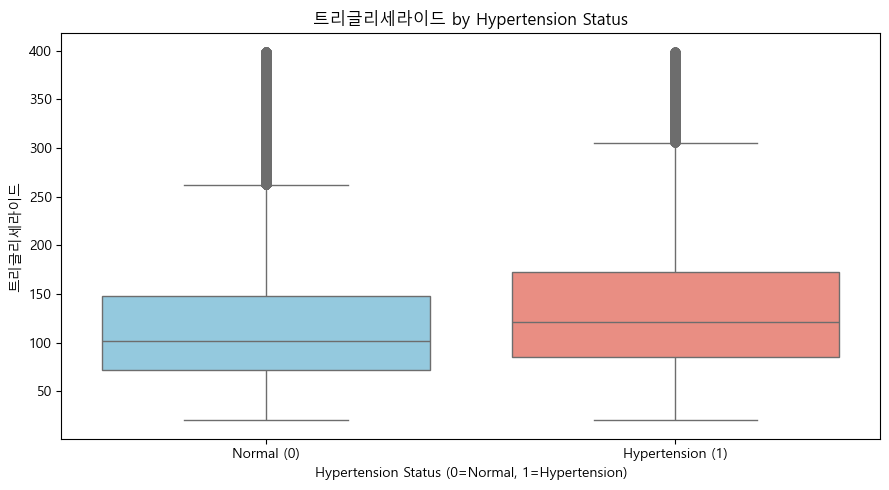

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# 예시 데이터프레임 확인 (실제 코드에서는 df_filtered2가 있어야 함)
# print(df_filtered2.columns)

target_col3 = '트리글리세라이드'

plt.figure(figsize=(9, 5))  # subplot 1개라 크기 줄임

sns.boxplot(data=df_filtered2, x='hypertension_status', y=target_col3, palette={'0': 'skyblue', '1': 'salmon'})
plt.title(f'{target_col3} by Hypertension Status')
plt.xlabel('Hypertension Status (0=Normal, 1=Hypertension)')
plt.ylabel(target_col3)
plt.xticks([0, 1], ['Normal (0)', 'Hypertension (1)'])

plt.tight_layout()
plt.show()

# 식전혈당(공복혈당)

Text(0, 0.5, 'Frequency')

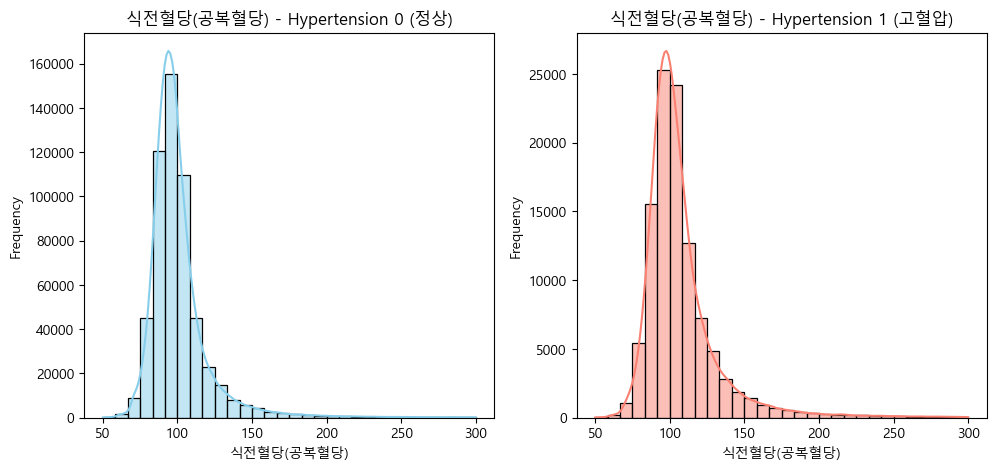

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

target_col1 = '시력(좌)'
target_col2 = 'LDL콜레스테롤'
target_col3 = '트리글리세라이드'
target_col4 = '식전혈당(공복혈당)'

group_0 = df_filtered2[df_filtered2['hypertension_status'] == 0] #정상
group_1 = df_filtered2[df_filtered2['hypertension_status'] == 1] #고혈압

plt.figure(figsize=(18, 5))


plt.subplot(1, 3, 1)
sns.histplot(group_0[target_col4], kde=True, bins=30, color='skyblue')
plt.title(f'{target_col4} - Hypertension 0 (정상)')
plt.xlabel(target_col4)
plt.ylabel('Frequency')


plt.subplot(1, 3, 2)
sns.histplot(group_1[target_col4], kde=True, bins=30, color='salmon')
plt.title(f'{target_col4} - Hypertension 1 (고혈압)')
plt.xlabel(target_col4)
plt.ylabel('Frequency')

C:\Users\asia\AppData\Local\Temp\ipykernel_10112\1175619796.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = df_filtered2.groupby(['bin', 'hypertension_status']).size().reset_index(name='count')


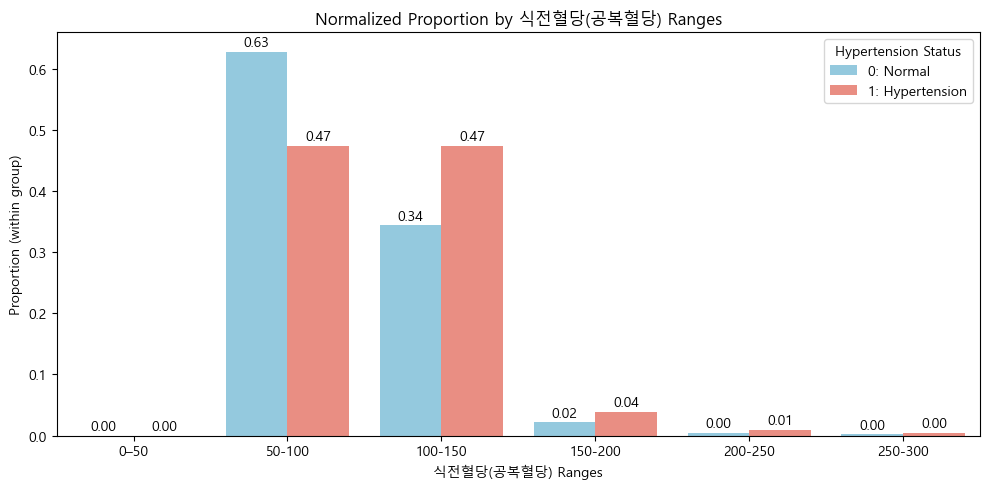

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 대상 변수 설정
target_col4 = '식전혈당(공복혈당)'

# 구간 나누기 (0~300, 구간 50 단위 → 6개 구간)
bins = [0, 50, 100, 150, 200, 250, 300]
labels = ['0–50', '50-100', '100-150', '150-200', '200-250', '250-300']

df_filtered2['bin'] = pd.cut(df_filtered2[target_col4], bins=bins, labels=labels, include_lowest=True)

# 각 그룹의 전체 수 (정규화 기준)
total_normal = len(df_filtered2[df_filtered2['hypertension_status'] == 0])
total_hyper = len(df_filtered2[df_filtered2['hypertension_status'] == 1])

# 구간별 count 계산
bin_counts = df_filtered2.groupby(['bin', 'hypertension_status']).size().reset_index(name='count')

# 정규화된 비율 (각 그룹의 전체 수 대비 비율)
def normalize(row):
    if row['hypertension_status'] == 0:
        return row['count'] / total_normal
    else:
        return row['count'] / total_hyper

bin_counts['normalized_ratio'] = bin_counts.apply(normalize, axis=1)

# 시각화
plt.figure(figsize=(10, 5))
barplot = sns.barplot(  # ← barplot 객체로 저장
    data=bin_counts,
    x='bin',
    y='normalized_ratio',
    hue='hypertension_status',
    palette={0: 'skyblue', 1: 'salmon'}  # 각 클래스 색 명시
)

# 막대 위에 수치 표시
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f', label_type='edge', padding=2)
    
 # 범례 수동 설정
handles, labels = barplot.get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=['0: Normal', '1: Hypertension'],
    title='Hypertension Status'
)

plt.title(f'Normalized Proportion by {target_col4} Ranges')
plt.xlabel(f'{target_col4} Ranges')
plt.ylabel('Proportion (within group)')
plt.tight_layout()
plt.show()

C:\Users\asia\AppData\Local\Temp\ipykernel_10112\3381344559.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered2, x='hypertension_status', y=target_col4, palette={'0': 'skyblue', '1': 'salmon'})


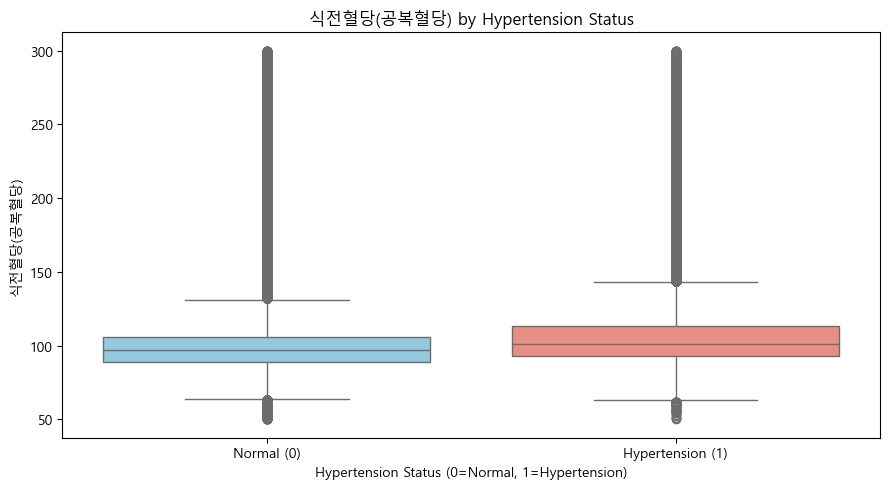

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# 예시 데이터프레임 확인 (실제 코드에서는 df_filtered2가 있어야 함)
# print(df_filtered2.columns)

target_col4 = '식전혈당(공복혈당)'

plt.figure(figsize=(9, 5))  # subplot 1개라 크기 줄임

sns.boxplot(data=df_filtered2, x='hypertension_status', y=target_col4, palette={'0': 'skyblue', '1': 'salmon'})
plt.title(f'{target_col4} by Hypertension Status')
plt.xlabel('Hypertension Status (0=Normal, 1=Hypertension)')
plt.ylabel(target_col4)
plt.xticks([0, 1], ['Normal (0)', 'Hypertension (1)'])

plt.tight_layout()
plt.show()

# 왜도, 첨도 확인

In [104]:
import pandas as pd
from scipy.stats import skew, kurtosis

# 수치형 변수만 선택
numeric_cols = df_filtered2.select_dtypes(include=['number']).columns

# 왜도와 첨도 계산
skew_kurtosis_df = pd.DataFrame({
    'Skewness': df_filtered2[numeric_cols].apply(skew),
    'Kurtosis': df_filtered2[numeric_cols].apply(kurtosis)
})

# 소수점 둘째 자리까지 반올림
skew_kurtosis_df = skew_kurtosis_df.round(2)

# 왜도 기준으로 정렬
skew_kurtosis_df = skew_kurtosis_df.sort_values(by='Skewness', ascending=False)

print(skew_kurtosis_df.to_string())


                     Skewness  Kurtosis
시력(우)                   10.44    162.58
ggtp_alt_ratio          10.38    424.40
혈청지오티(AST)               6.89    100.60
감마지티피                    5.71     51.94
혈청지피티(ALT)               4.72     44.16
요단백                      4.49     23.14
alt_ast_ratio            3.93    162.00
식전혈당(공복혈당)               3.08     15.88
혈청크레아티닌                  2.96     42.87
tg_hdl_ratio             1.85      5.03
hypertension_status      1.84      1.37
트리글리세라이드                 1.36      1.96
흡연상태                     0.96     -0.73
ldl_hdl_ratio            0.83      1.33
HDL콜레스테롤                 0.80      1.05
pulse_pressure           0.74      1.58
bmi                      0.71      1.44
체중(5kg단위)                0.70      0.85
수축기혈압                    0.48      0.94
이완기혈압                    0.34      0.69
LDL콜레스테롤                 0.33      0.13
허리둘레                     0.31      0.37
총콜레스테롤                   0.30      0.11
성별코드                     0.18     -1.97


## 왜도(skewness) = 비대칭성
정의: 분포가 평균 기준으로 얼마나 비대칭인지 나타냅니다.

해석:

왜도 ≈ 0: 대칭적인 분포 (정규분포에 가까움)

왜도 > 0: 오른쪽으로 꼬리가 긴 분포 (우측 비대칭)

왜도 < 0: 왼쪽으로 꼬리가 긴 분포 (좌측 비대칭)

✅ 스케일링/변환 적용 기준:
왜도가 |1| 이상이면, 정규성을 크게 벗어난 분포라고 간주하고 로그 변환, Box-Cox, Yeo-Johnson 등의 **정규화 변환(normalization)**이 필요할 수 있습니다.

### ㅣ왜도ㅣ>=1 - 로그 변환시킨 칼럼 + ㅣ왜도ㅣ< 1 - 원래 상태 유지한 칼럼 = df_log_transformed

In [105]:
import numpy as np

# 왜도의 절댓값 기준으로 컬럼 분리
high_skew_cols = skew_kurtosis_df[skew_kurtosis_df['Skewness'].abs() >= 1].index
low_skew_cols = skew_kurtosis_df[skew_kurtosis_df['Skewness'].abs() < 1].index

# 로그 변환 (음수나 0이 있을 수 있으므로 1 더해줌)
df_log = df_filtered2[high_skew_cols].apply(lambda x: np.log1p(x))
df_log.columns = [col + '_log' for col in df_log.columns]  # 컬럼명 뒤에 '_log' 붙이기

# 그대로 유지할 변수는 복사
df_no_log = df_filtered2[low_skew_cols].copy()

# 두 그룹 합치기
df_log_transformed = pd.concat([df_log, df_no_log], axis=1)


In [106]:
df_log_transformed.columns

Index(['시력(우)_log', 'ggtp_alt_ratio_log', '혈청지오티(AST)_log', '감마지티피_log',
       '혈청지피티(ALT)_log', '요단백_log', 'alt_ast_ratio_log', '식전혈당(공복혈당)_log',
       '혈청크레아티닌_log', 'tg_hdl_ratio_log', 'hypertension_status_log',
       '트리글리세라이드_log', '흡연상태', 'ldl_hdl_ratio', 'HDL콜레스테롤', 'pulse_pressure',
       'bmi', '체중(5kg단위)', '수축기혈압', '이완기혈압', 'LDL콜레스테롤', '허리둘레', '총콜레스테롤',
       '성별코드', '시력(좌)', '연령대코드(5세단위)', '신장(5cm단위)', '혈색소', '음주여부'],
      dtype='object')

In [107]:
import pandas as pd
df_log_transformed.to_csv("../data/processed/df_log_transformed.csv", index=False)

In [108]:
df_filtered2 = df_filtered2.drop(columns=[col for col in df_filtered2.columns if col.endswith('_log')])
df_filtered2.columns

Index(['성별코드', '연령대코드(5세단위)', '신장(5cm단위)', '체중(5kg단위)', '허리둘레', '시력(좌)',
       '시력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드',
       'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)',
       '혈청지피티(ALT)', '감마지티피', '흡연상태', '음주여부', 'bmi', 'alt_ast_ratio',
       'tg_hdl_ratio', 'ggtp_alt_ratio', 'ldl_hdl_ratio', 'pulse_pressure',
       'hypertension_status', 'bin'],
      dtype='object')

## 첨도 (Kurtosis) — 뾰족함
정의: 분포의 중심이 얼마나 뾰족한지를 나타냅니다.

해석:

첨도 ≈ 3: 정규분포와 유사 (중심이 적당히 뾰족함)

첨도 > 3: 뾰족한 분포 — 이상치가 많을 가능성

첨도 < 3: 평평한 분포 — 중심 집중도가 낮음

✅ 스케일링/변환 적용 기준:
첨도가 클수록 이상치(outliers)가 많을 가능성이 높기 때문에, RobustScaler (중앙값 기준), 또는 변환을 적용해 이상치 영향을 줄여야 합니다.

### 첨도 > 3 - RobustScaler 적용 - 정규화

In [109]:
from sklearn.preprocessing import RobustScaler
from scipy.stats import kurtosis
import pandas as pd

# 수치형 변수 선택
numeric_cols = df_filtered2.select_dtypes(include=['number']).columns

# 첨도 계산
kurtosis_series = df_filtered2[numeric_cols].apply(kurtosis)

# 첨도 기준으로 나누기
cols_to_scale = kurtosis_series[kurtosis_series >= 3].index.tolist()
cols_to_keep = kurtosis_series[kurtosis_series < 3].index.tolist()

# RobustScaler 적용
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df_filtered2[cols_to_scale])

# 결과를 DataFrame으로 변환, 컬럼명 뒤에 "_robust" 붙이기
scaled_df = pd.DataFrame(scaled_data, columns=[col + '_robust' for col in cols_to_scale], index=df_filtered2.index)

# 원본 그대로 유지할 변수들 추출
unchanged_df = df_filtered2[cols_to_keep]

# 두 DataFrame 병합
df_robust_scaled = pd.concat([unchanged_df, scaled_df], axis=1)

# 결과 확인
df_robust_scaled.columns



Index(['성별코드', '연령대코드(5세단위)', '신장(5cm단위)', '체중(5kg단위)', '허리둘레', '시력(좌)',
       '수축기혈압', '이완기혈압', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '흡연상태', '음주여부', 'bmi', 'ldl_hdl_ratio', 'pulse_pressure',
       'hypertension_status', '시력(우)_robust', '식전혈당(공복혈당)_robust',
       '요단백_robust', '혈청크레아티닌_robust', '혈청지오티(AST)_robust',
       '혈청지피티(ALT)_robust', '감마지티피_robust', 'alt_ast_ratio_robust',
       'tg_hdl_ratio_robust', 'ggtp_alt_ratio_robust'],
      dtype='object')

In [110]:
df_robust_scaled.to_csv("../data/processed/df_robust_scaled.csv", index=False)

In [111]:
import numpy as np

# 왜도의 절댓값 기준으로 컬럼 분리
high_skew_cols = skew_kurtosis_df[skew_kurtosis_df['Skewness'].abs() >= 1].index
low_skew_cols = skew_kurtosis_df[skew_kurtosis_df['Skewness'].abs() < 1].index

# 로그 변환 (음수나 0이 있을 수 있으므로 1 더해줌)
df_log = df_filtered2[high_skew_cols].apply(lambda x: np.log1p(x))
df_log.columns = [col + '_log' for col in df_log.columns]  # 컬럼명 뒤에 '_log' 붙이기

# 그대로 유지할 변수는 복사
df_no_log = df_filtered2[low_skew_cols].copy()

# 두 그룹 합치기
df_log_robust = pd.concat([df_log, df_no_log], axis=1)

## 왜도 & 첨도 둘 다 적용시킨 경우

In [112]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import RobustScaler

# 수치형 컬럼
numeric_cols = df_filtered2.select_dtypes(include='number').columns

# 왜도 & 첨도 계산
skewness = df_filtered2[numeric_cols].apply(skew)
kurtosis_ = df_filtered2[numeric_cols].apply(kurtosis)

# 컬럼 분류
high_skew = skewness[skewness.abs() >= 1].index
high_kurt = kurtosis_[kurtosis_ >= 3].index

only_log_cols = high_skew.difference(high_kurt)
only_robust_cols = high_kurt.difference(high_skew)
both_cols = high_skew.intersection(high_kurt)
unchanged_cols = numeric_cols.difference(high_skew.union(high_kurt))

scaler = RobustScaler()

# 로그 변환만
if len(only_log_cols) > 0:
    df_log = df_filtered2[only_log_cols].apply(lambda x: np.log1p(x))
    df_log.columns = [col + '_log' for col in df_log.columns]
else:
    df_log = pd.DataFrame(index=df_filtered2.index)

# RobustScaler만
if len(only_robust_cols) > 0:
    df_robust = pd.DataFrame(
        scaler.fit_transform(df_filtered2[only_robust_cols]),
        columns=[col + '_robust' for col in only_robust_cols],
        index=df_filtered2.index
    )
else:
    df_robust = pd.DataFrame(index=df_filtered2.index)

# 로그 + RobustScaler
if len(both_cols) > 0:
    df_log_then_robust = df_filtered2[both_cols].apply(lambda x: np.log1p(x))
    df_log_robust = pd.DataFrame(
        scaler.fit_transform(df_log_then_robust),
        columns=[col + '_log_robust' for col in both_cols],
        index=df_filtered2.index
    )
else:
    df_log_robust = pd.DataFrame(index=df_filtered2.index)

# 그대로 유지할 컬럼
df_unchanged = df_filtered2[unchanged_cols]

# 최종 결합
df_log_robust_scaled = pd.concat([df_log, df_robust, df_log_robust, df_unchanged], axis=1)



In [113]:
df_log_robust_scaled.columns

Index(['hypertension_status_log', '트리글리세라이드_log', '시력(우)_log_robust',
       '식전혈당(공복혈당)_log_robust', '요단백_log_robust', '혈청크레아티닌_log_robust',
       '혈청지오티(AST)_log_robust', '혈청지피티(ALT)_log_robust', '감마지티피_log_robust',
       'alt_ast_ratio_log_robust', 'tg_hdl_ratio_log_robust',
       'ggtp_alt_ratio_log_robust', 'HDL콜레스테롤', 'LDL콜레스테롤', 'bmi',
       'ldl_hdl_ratio', 'pulse_pressure', '성별코드', '수축기혈압', '시력(좌)',
       '신장(5cm단위)', '연령대코드(5세단위)', '음주여부', '이완기혈압', '체중(5kg단위)', '총콜레스테롤',
       '허리둘레', '혈색소', '흡연상태'],
      dtype='object')

In [114]:
df_log_robust_scaled.to_csv("../data/processed/df_log_robust_scaled.csv", index=False)

## Cf. 왜도, 첨도 정규화 전 분포 시각화

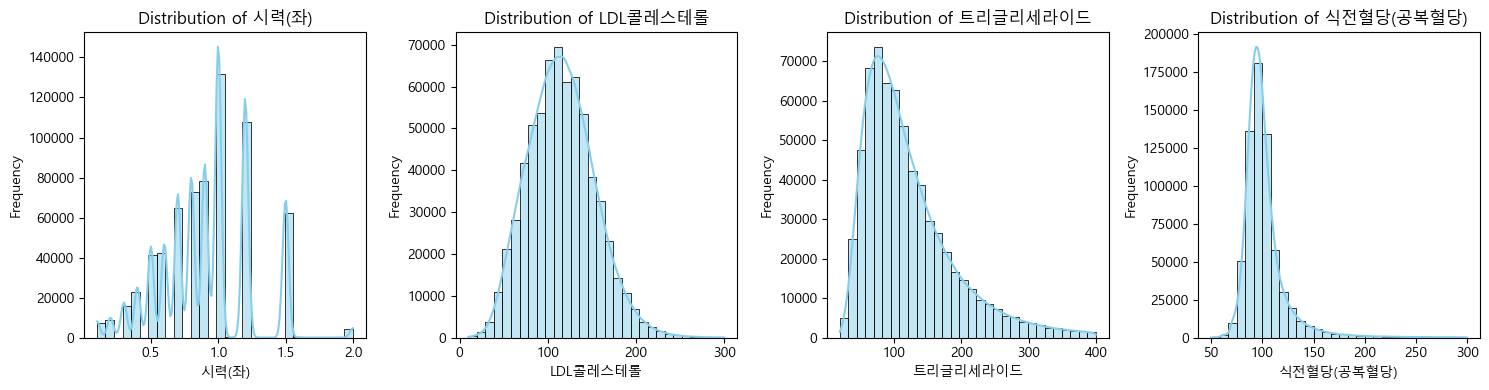

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_columns = ['시력(좌)', 'LDL콜레스테롤', '트리글리세라이드','식전혈당(공복혈당)']

plt.figure(figsize=(15, 4))

for i, column in enumerate(selected_columns):
    plt.subplot(1, len(selected_columns), i + 1)
    sns.histplot(df_filtered2[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## 왜도, 첨도 기준 정규화시킨 결과 시각화

In [116]:
df_log_transformed.columns

Index(['시력(우)_log', 'ggtp_alt_ratio_log', '혈청지오티(AST)_log', '감마지티피_log',
       '혈청지피티(ALT)_log', '요단백_log', 'alt_ast_ratio_log', '식전혈당(공복혈당)_log',
       '혈청크레아티닌_log', 'tg_hdl_ratio_log', 'hypertension_status_log',
       '트리글리세라이드_log', '흡연상태', 'ldl_hdl_ratio', 'HDL콜레스테롤', 'pulse_pressure',
       'bmi', '체중(5kg단위)', '수축기혈압', '이완기혈압', 'LDL콜레스테롤', '허리둘레', '총콜레스테롤',
       '성별코드', '시력(좌)', '연령대코드(5세단위)', '신장(5cm단위)', '혈색소', '음주여부'],
      dtype='object')

In [146]:
#target_col1 = '시력(좌)_log'
#target_col2 = 'LDL콜레스테롤'
#target_col3 = '트리글리세라이드_log'
#target_col4 = '식전혈당(공복혈당)_log'

selected_columns = ['시력(좌)', 'LDL콜레스테롤', '트리글리세라이드_log','식전혈당(공복혈당)_log']
df_selected1 = df_log_transformed[selected_columns]

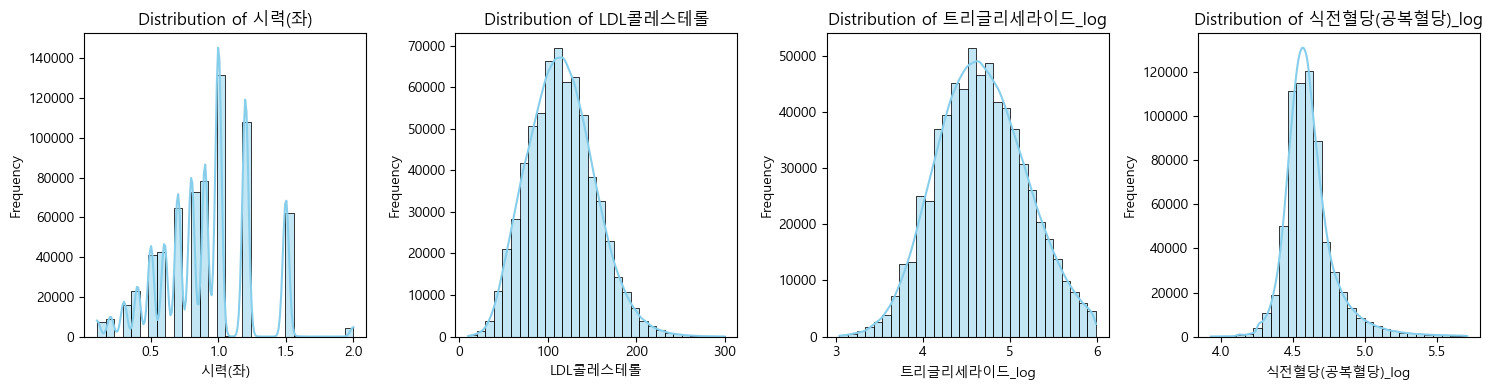

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 4))

for i, column in enumerate(selected_columns):
    plt.subplot(1, len(selected_columns), i + 1)
    sns.histplot(df_selected1[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
df_robust_scaled.columns

Index(['성별코드', '연령대코드(5세단위)', '신장(5cm단위)', '체중(5kg단위)', '허리둘레', '수축기혈압',
       '이완기혈압', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '흡연상태',
       '음주여부', 'bmi', 'ldl_hdl_ratio', 'pulse_pressure', 'hypertension_status',
       '시력(좌)_robust', '시력(우)_robust', '식전혈당(공복혈당)_robust', '요단백_robust',
       '혈청크레아티닌_robust', '혈청지오티(AST)_robust', '혈청지피티(ALT)_robust',
       '감마지티피_robust', 'alt_ast_ratio_robust', 'tg_hdl_ratio_robust',
       'ggtp_alt_ratio_robust'],
      dtype='object')

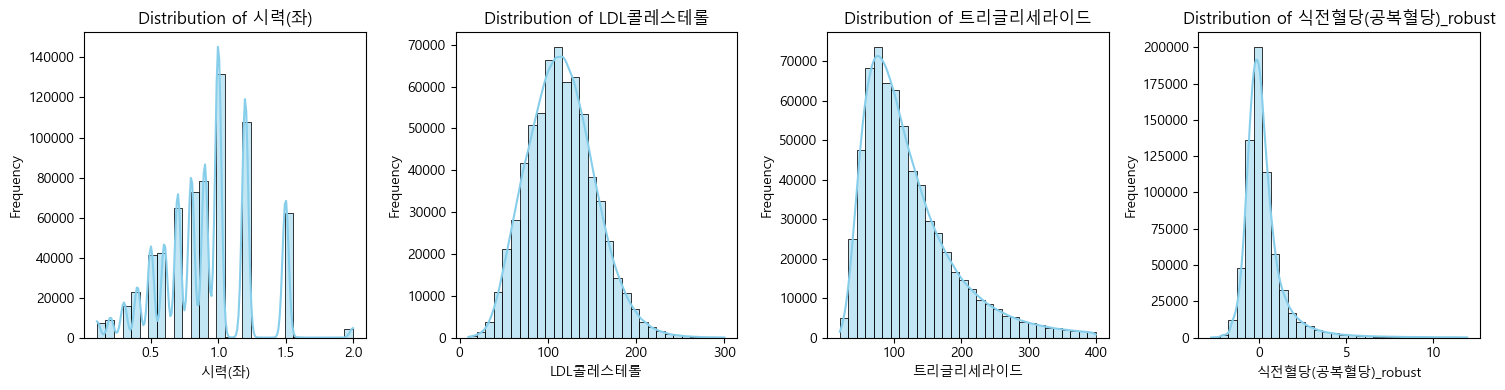

In [149]:
selected_columns = ['시력(좌)', 'LDL콜레스테롤', '트리글리세라이드','식전혈당(공복혈당)_robust']
df_selected2 = df_robust_scaled[selected_columns]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 4))

for i, column in enumerate(selected_columns):
    plt.subplot(1, len(selected_columns), i + 1)
    sns.histplot(df_selected2[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [144]:
df_log_robust_scaled.columns

Index(['hypertension_status_log', '트리글리세라이드_log', '시력(우)_log_robust',
       '식전혈당(공복혈당)_log_robust', '요단백_log_robust', '혈청크레아티닌_log_robust',
       '혈청지오티(AST)_log_robust', '혈청지피티(ALT)_log_robust', '감마지티피_log_robust',
       'alt_ast_ratio_log_robust', 'tg_hdl_ratio_log_robust',
       'ggtp_alt_ratio_log_robust', 'HDL콜레스테롤', 'LDL콜레스테롤', 'bmi',
       'ldl_hdl_ratio', 'pulse_pressure', '성별코드', '수축기혈압', '시력(좌)',
       '신장(5cm단위)', '연령대코드(5세단위)', '음주여부', '이완기혈압', '체중(5kg단위)', '총콜레스테롤',
       '허리둘레', '혈색소', '흡연상태'],
      dtype='object')

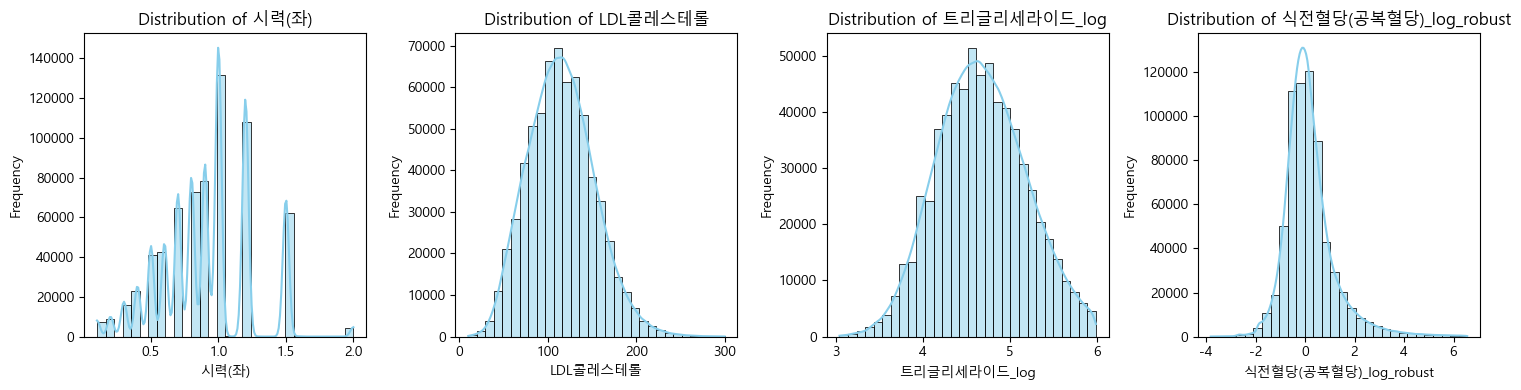

In [159]:
selected_columns = ['시력(좌)', 'LDL콜레스테롤', '트리글리세라이드_log','식전혈당(공복혈당)_log_robust']
df_selected3 = df_log_robust_scaled[selected_columns]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 4))

for i, column in enumerate(selected_columns):
    plt.subplot(1, len(selected_columns), i + 1)
    sns.histplot(df_selected3[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

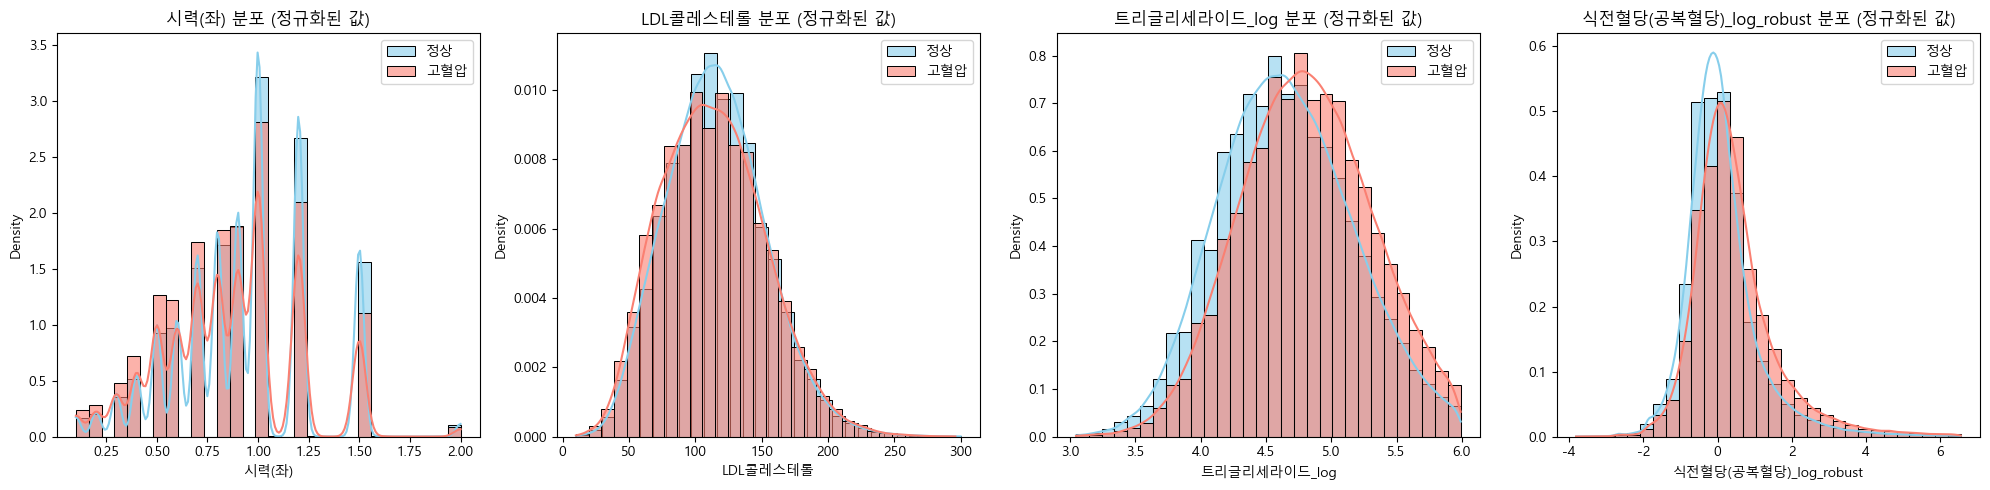

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_columns = ['시력(좌)', 'LDL콜레스테롤', '트리글리세라이드_log', '식전혈당(공복혈당)_log_robust']

df_selected3 = df_log_robust_scaled[selected_columns].copy()
df_selected3['hypertension_status'] = df_filtered2['hypertension_status'].values

plt.figure(figsize=(20, 5))

for i, column in enumerate(selected_columns):
    plt.subplot(1, len(selected_columns), i + 1)
    
    sns.histplot(df_selected3[df_selected3['hypertension_status'] == 0][column],
                 color='skyblue', label='정상', kde=True, stat='density', bins=30, alpha=0.6)
    
    sns.histplot(df_selected3[df_selected3['hypertension_status'] == 1][column],
                 color='salmon', label='고혈압', kde=True, stat='density', bins=30, alpha=0.6)
    
    plt.title(f'{column} 분포 (정규화된 값)')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()



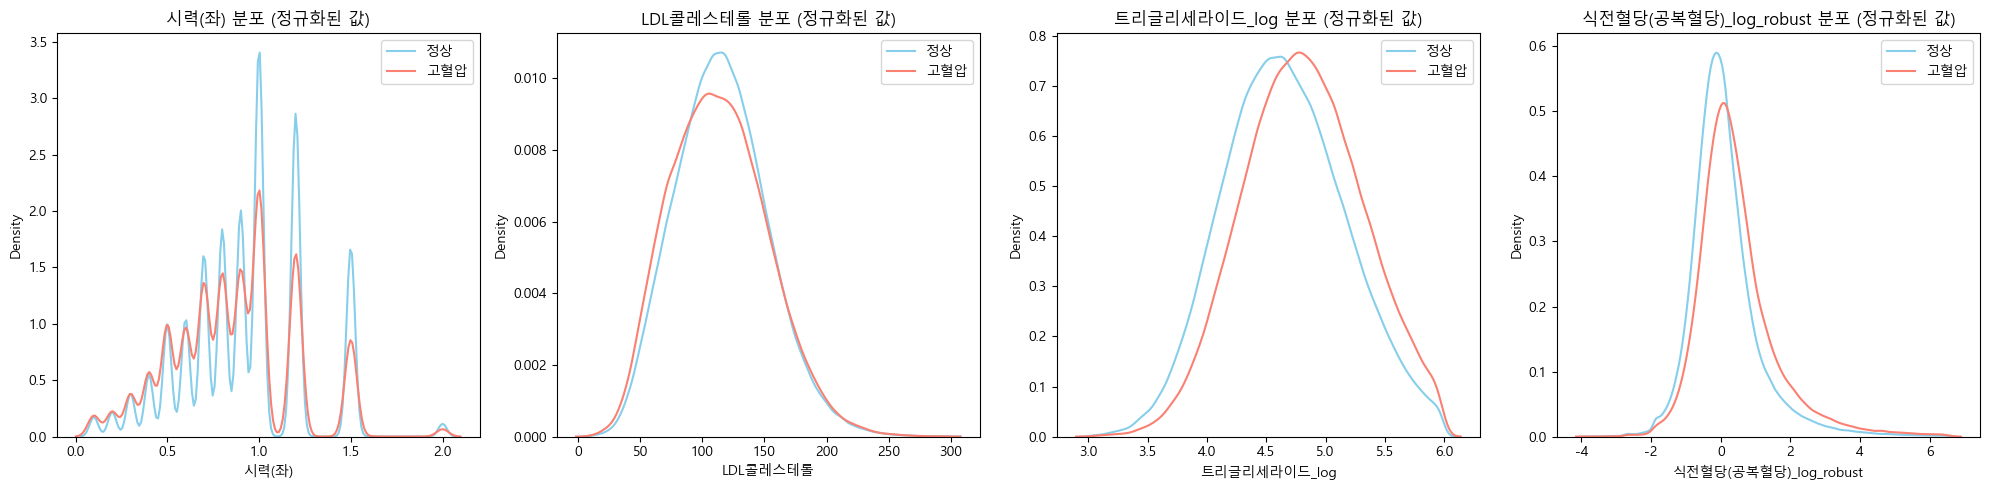

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_columns = ['시력(좌)', 'LDL콜레스테롤', '트리글리세라이드_log', '식전혈당(공복혈당)_log_robust']

df_selected3 = df_log_robust_scaled[selected_columns].copy()
df_selected3['hypertension_status'] = df_filtered2['hypertension_status'].values

plt.figure(figsize=(20, 5))

for i, column in enumerate(selected_columns):
    plt.subplot(1, len(selected_columns), i + 1)
    
    sns.kdeplot(df_selected3[df_selected3['hypertension_status'] == 0][column],
                color='skyblue', label='정상', fill=False)
    
    sns.kdeplot(df_selected3[df_selected3['hypertension_status'] == 1][column],
                color='salmon', label='고혈압', fill=False)
    
    plt.title(f'{column} 분포 (정규화된 값)')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()
